<a href="https://colab.research.google.com/github/a01137646/MNA_Public/blob/main/Redneuronal_Equipo49.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 7**
###**Red Neuronal Artificial - Perceptrón Multicapa : Multilayer Perceptrón (MLP)**


**Nombres y matrículas de los integrantes del equipo:**

* Gerardo Aaron Castañeda Jaramillo - A01137646
* Dalina Aidee Villa Ocelotl - A01793258
* Yocelin Juárez Arroyo - A00819828
* Victor Hugo Avila Felipe - A01794425


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [1]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt 
import seaborn as sns 

import requests
import zipfile as zf
from io import BytesIO

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler, OrdinalEncoder

from sklearn.dummy import DummyRegressor

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold, cross_validate
from sklearn.metrics import classification_report, make_scorer

from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import get_scorer

from sklearn.inspection import permutation_importance

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [2]:
def zip_to_df(url, filename, separator):

  print('Downloading started')
  # Split URL to get the file name
  req = requests.get(url)

  foldername = url.split('/')[-1].split('.')[-2]
  print('Downloading Completed') 

  # extracting the zip file contents
  zipfile= zf.ZipFile(BytesIO(req.content))
  zipfile.extractall('/content/sample_data/' + foldername)
  df = pd.read_csv("/content/sample_data/" + foldername + '/' + filename,sep=separator)

  return df

Funcion para extrar .zip y convertirlo a dataframe

Obtenemos nuestro dataframe

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00368/Facebook_metrics.zip'

df = zip_to_df(url,'dataset_Facebook.csv',';')
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


Las variables de entrada unicamente seran aquellas indicadas en la tabla 3 del siguiente [articulo](https://www.semanticscholar.org/paper/Predicting-social-media-performance-metrics-and-of-Moro-Rita/dec55692590820754b53c916e29bb2b42c0e5104)

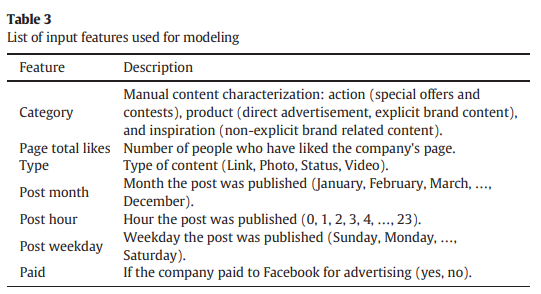

In [4]:
X = df[['Category','Page total likes','Type','Post Month','Post Hour','Post Weekday','Paid']]
X.head()

,Category,Page total likes,Type,Post Month,Post Hour,Post Weekday,Paid
0,2,139441,Photo,12,3,4,0.0
1,2,139441,Status,12,10,3,0.0
2,3,139441,Photo,12,3,3,0.0
3,2,139441,Photo,12,10,2,1.0
4,2,139441,Photo,12,3,2,0.0


In [5]:
df['Type'].value_counts()

Photo     426
Status     45
Link       22
Video       7
Name: Type, dtype: int64

Asi como se indica, como variable de salida unicamente utilizaremos: Lifetime post consumers”, “Lifetime People who have liked a Page and engaged with a post” y “Likes”

In [6]:
Y = df[['Lifetime Post Consumers','Lifetime People who have liked your Page and engaged with your post','like']]
Y.head()

,Lifetime Post Consumers,Lifetime People who have liked your Page and engaged with your post,like
0,109,119,79.0
1,1361,1108,130.0
2,113,132,66.0
3,790,1386,1572.0
4,410,396,325.0


#**Ejercicio-1.** 

En esta tarea considera únicamente la siguiente variable de salida que se concluye que es una de las mejores en el artículo antes citado:  ‘Lifetime People who have liked a Page and engaged with a post'. Renombra dicha variable como “LPE” . Como variables de entrada selecciona las 7 variables que indican los autores en la Tabla 3 del artículo citado

Previamente ya seleccionamos las 7 variables de la tabla 3

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Category          500 non-null    int64  
 1   Page total likes  500 non-null    int64  
 2   Type              500 non-null    object 
 3   Post Month        500 non-null    int64  
 4   Post Hour         500 non-null    int64  
 5   Post Weekday      500 non-null    int64  
 6   Paid              499 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 27.5+ KB


A pimera vista salta que la variable de "Paid" tiene un valor nulo

Y trabajamos con la variable de salida "Lifetime People who have liked a Page and engaged with a post":

In [8]:
Y = df[['Lifetime People who have liked your Page and engaged with your post']]
Y = Y.rename(columns = {'Lifetime People who have liked your Page and engaged with your post':'LPE'})
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   LPE     500 non-null    int64
dtypes: int64(1)
memory usage: 4.0 KB


#**Ejercicio-2.**

Realiza una partición de los datos con 100 datos de Prueba y el resto para entrenamiento y validación

In [9]:
Xtv, Xtest, ytv, ytest = train_test_split(X, Y, test_size=100,random_state=1)
print(Xtv.shape, ': dimensión de datos de entrada de entrenamiento y validación')
print(Xtest.shape, ': dimensión de datos de entrada de prueba')  
print(ytv.shape, ': dimensión de variable de salida para entrenamiento y validación')
print(ytest.shape, ': dimensión de variable de salida para prueba')

(400, 7) : dimensión de datos de entrada de entrenamiento y validación
(100, 7) : dimensión de datos de entrada de prueba
(400, 1) : dimensión de variable de salida para entrenamiento y validación
(100, 1) : dimensión de variable de salida para prueba


#**Ejercicio-3.**

Definirás tus propias funciones de errores para este problema de regresión. Los errores que utilizarás son la raíz cuadrada del error cuadrático medio RMSE, el error absoluto medio MAE y el error porcentual absoluto medio MAPE. 

In [10]:
def mi_RMSE(y_val,yhat_val):
  return np.sqrt(np.square(np.subtract(y_val,yhat_val)).mean())

def mi_MAE(y_val,yhat_val):
  return np.abs(np.subtract(y_val,yhat_val)).mean()

def mi_MAPE(y_val,yhat_val):
  return np.abs(np.subtract(y_val,yhat_val)/y_val).mean()

#**Ejercicio-4.**

En la página de la UCI, así como en el artículo de los autores previamente citado encuentras información en relación al significado de cada variable. Haz una análisis de tus datos y lleva a cabo las transformaciones que consideres adecuadas tanto en los datos de entrada, como en las de salida. 
Utiliza un Pipeline para evitar el filtrado de información. 

Comenzamos definiendo el tipo de variables para las variables de entrada:

In [11]:
#valores numéricos
num_nombres = ['Page total likes']
#valores binarios
bin_nombres = ['Paid']
#valores ordinales
ord_nombres = ['Post Hour','Post Weekday','Post Month']
#valores categoricos
cat_nombres = ['Category','Type']

Sabemos del analisis previo que la variable de 'Paid' tiene un valor nulo

In [12]:
df['Paid'].isnull().values.any()

True

Observamos si la variable numerica tiene valores negativos o no, para saber si podemos utilizar box-cox

In [13]:
df['Page total likes'].describe()

count       500.000000
mean     123194.176000
std       16272.813214
min       81370.000000
25%      112676.000000
50%      129600.000000
75%      136393.000000
max      139441.000000
Name: Page total likes, dtype: float64

Hacemos lo mismo para la variable de salida:

In [14]:
Y.describe()

,LPE
count,500.000000
mean,609.986000
std,612.725618
min,9.000000
25%,291.000000
50%,412.000000
75%,656.250000
max,4376.000000


In [15]:
def Sqrt_cx(x):
  c = x.max()
  tmp = np.power(c+1-x,1/2)
  return tmp

Graficamos los histogramas de la variable numerica con sus transformaciones

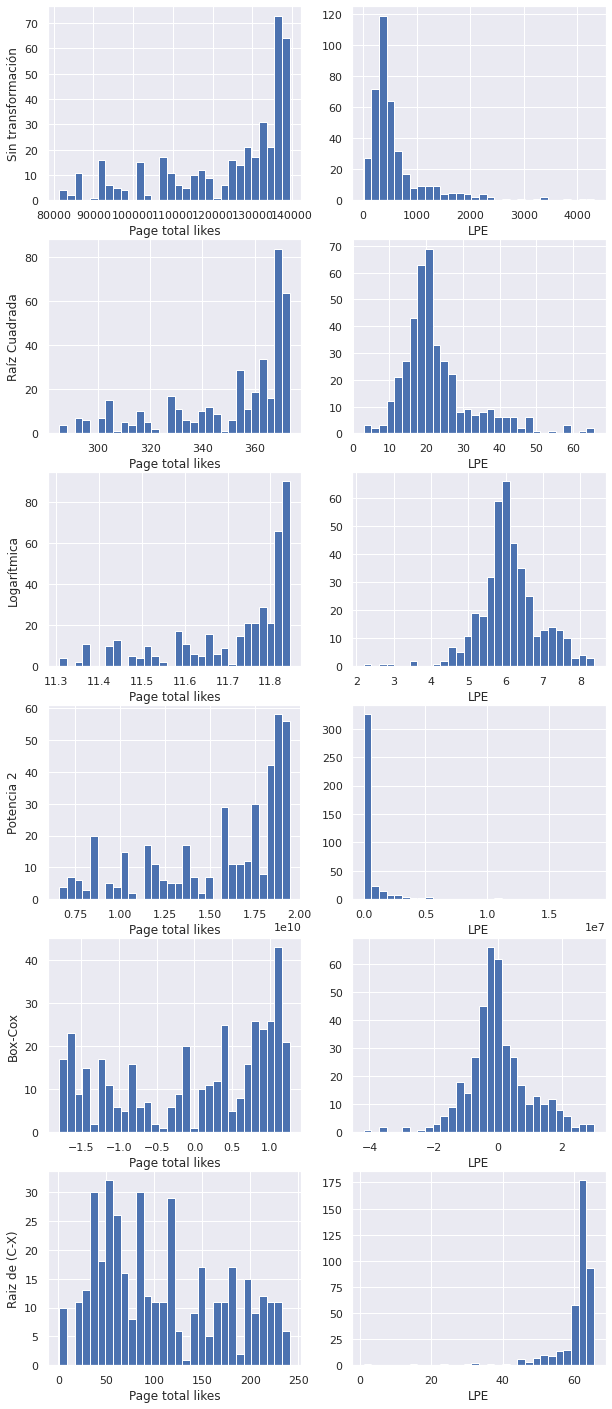

In [16]:
df_transform = Xtv[num_nombres].append(ytv)
sns.set(rc={'figure.figsize':(10,25)})
k=0
fig, axes = plt.subplots(6, 2)   
for k in range(0,2):  
  plt.subplot(6, 2,k+1) 

  Transf0 = df_transform.iloc[:,k].to_numpy().reshape(-1, 1) 
  plt.hist(Transf0, bins=30) 
  plt.xlabel(df_transform.columns[k])
  if k==0:
    plt.ylabel('Sin transformación')
  
  plt.subplot(6, 2,k+3)    
  Transf1 = np.sqrt(Transf0)       
  plt.hist(Transf1, bins=30)                      
  plt.xlabel(df_transform.columns[k])
  if k==0:
    plt.ylabel('Raíz Cuadrada')

  plt.subplot(6, 2,k+5)    
  Transf2 = np.log(Transf0)       
  plt.hist(Transf2, bins=30)                   
  plt.xlabel(df_transform.columns[k])
  if k==0:
    plt.ylabel('Logarítmica')

  plt.subplot(6, 2,k+7)  
  Transf3 = np.power(Transf0,2)     
  plt.hist(Transf3, bins=30)                   
  plt.xlabel(df_transform.columns[k])
  if k==0:
    plt.ylabel('Potencia 2')

  plt.subplot(6, 2,k+9)    
  Transf4 = power_transform(Transf0,method='box-cox')          
  plt.hist(Transf4, bins=30)                   
  plt.xlabel(df_transform.columns[k])
  if k==0:
    plt.ylabel('Box-Cox')  

  plt.subplot(6, 2,k+11)    
  Transf5 = Sqrt_cx(df_transform.iloc[:,k])        
  plt.hist(Transf5, bins=30)                   
  plt.xlabel(df_transform.columns[k])
  if k==0:
    plt.ylabel('Raiz de (C-X)')  

Mientras que ninguna transformacion logra una distribucion gaussiana para 'Page total likes', podemos ver que la mejor resultado tiene es box-cox. 

Comenzamos creando el pipeline:

In [110]:
########################################################################
#viejo no usar este
#########################################################################

# Transformaciones a factores numéricos de entrada:
num_pipeline = Pipeline(steps = [('impMedia', SimpleImputer(strategy='mean')),
                                 ('box-cox', FunctionTransformer(power_transform,kw_args={'method':'box-cox'})),
                                 ('escalaNum', MinMaxScaler(feature_range=(0, 3)))
                                 ]) 
num_pipeline_nombres = num_nombres

# Transformaciones a variables binarias de entrada:
binImp_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent'))])  
binImp_pipeline_nombres = bin_nombres

# Transformaciones de ordinal encoder a categoricas con string:
catOHE_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')),
                                    ('encoder', OrdinalEncoder())])
catOHE_pipeline_nombres = cat_nombres




# Conjuntamos las transformaciones que se estarán aplicando a los datos de entrada:
columnasTransformer_X = ColumnTransformer(transformers = [('numpipe', num_pipeline, num_pipeline_nombres),
                                                        ('binimp', binImp_pipeline, binImp_pipeline_nombres),
                                                        ('catohe', catOHE_pipeline, catOHE_pipeline_nombres)],
                                        remainder='passthrough')

# Transformaciones a factores numéricos de salida:
num_pipeline2 = Pipeline(steps = [('impMedia', SimpleImputer(strategy='mean')),
                                  #('box-cox', FunctionTransformer(power_transform,kw_args={'method':'box-cox'}))
                                  ('Sqrt', FunctionTransformer(np.sqrt))
                                  #('escalaNum', MinMaxScaler(feature_range=(0, 1)))
                                  ]) 
num_pipeline_nombres2 = ['LPE']
# Conjuntamos las transformaciones que se estarán aplicando a los datos de salida:
columnasTransformer_Y = ColumnTransformer(transformers = [('numpipe', num_pipeline2, num_pipeline_nombres2)],
                                        remainder='passthrough')

In [18]:
# Transformaciones a factores numéricos de entrada:
num_pipeline = Pipeline(steps = [('impMedia', SimpleImputer(strategy='mean')),
                                 ('MaxSqrt', FunctionTransformer(Sqrt_cx)),
                                 ('escalaNum', StandardScaler())
                                 ]) 
num_pipeline_nombres = num_nombres

# Transformaciones a variables binarias y ordinales de entrada:
Imp_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent'))])  
Imp_pipeline_nombres = bin_nombres + ord_nombres

# Transformaciones de ordinal encoder a categoricas con string:
ordenco_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')),
                                    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=4))])
ordenco_pipeline_nombres = cat_nombres


# Conjuntamos las transformaciones que se estarán aplicando a los datos de entrada:
columnasTransformer_X = ColumnTransformer(transformers = [('numpipe', num_pipeline, num_pipeline_nombres),
                                                        ('impmoda', Imp_pipeline, Imp_pipeline_nombres),
                                                        ('ordenco', ordenco_pipeline, ordenco_pipeline_nombres)],
                                        remainder='passthrough')

# Transformaciones a factores numéricos de salida:
num_pipeline2 = Pipeline(steps = [('impMedia', SimpleImputer(strategy='mean')),
                                  ('Sqrt', FunctionTransformer(np.sqrt))
                                  ]) 
num_pipeline_nombres2 = ['LPE']
# Conjuntamos las transformaciones que se estarán aplicando a los datos de salida:
columnasTransformer_Y = ColumnTransformer(transformers = [('numpipe', num_pipeline2, num_pipeline_nombres2)],
                                        remainder='passthrough')

Utilizamos el método de imputar por la media en los valores numéricos. Así la media de cada variable se mantiene, y aunque se reduciría la desviación estándar un poco, podemos hacerlo asumiendo que los valores faltantes sean muy pocos comparados con el total de estos. Mientras que, para las variables categóricas y binarias, imputamos la moda. Esta representa el valor mas frecuente en cada variable, por lo que es valido utilizarlo.

De igual manera, para los valores numéricos, se utiliza el método de MinMaxScaler para transformarlos a un rango entre 0 y 1. Mientras que para los valores categóricos se utiliza one-hot encoder, lo cual los transforma los categóricos a variables dummies con valores de 0 y 1. La unica variable binaria ya se encuentra con valores de 0 y 1, por lo que la dejamos tal cual. Lo que finalmente nos deja todas las variables en la misma magnitud.

#**Ejercicio-5.**

Utiliza la función Dummy para modelos de regresión de scikit-learn con el conjunto que tienes de datos de entrenamiento y validación. Para ello particiónalos en 100 para validación y 300 para entrenamiento. Encuentra los errores RMSE, MAE y MAPE para los conjuntos de entrenamiento y validación. Estos serán tus errores máximos que deberás tomar como referencia en el resto de la actividad. Consulta su documentación correspondiente: 
 
[https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html)

In [19]:
X_train, X_val, y_train, y_val = train_test_split(Xtv, ytv, train_size=300)

print(X_train.shape, ': dimensión de datos de entrada de entrenamiento')
print(X_val.shape, ': dimensión de datos de entrada de validación')
print(Xtest.shape, ': dimensión de datos de entrada de prueba')  
print(y_train.shape, ': dimensión de variable de salida para entrenamiento')
print(y_val.shape, ': dimensión de variable de salida para validación')
print(ytest.shape, ': dimensión de variable de salida para prueba')

(300, 7) : dimensión de datos de entrada de entrenamiento
(100, 7) : dimensión de datos de entrada de validación
(100, 7) : dimensión de datos de entrada de prueba
(300, 1) : dimensión de variable de salida para entrenamiento
(100, 1) : dimensión de variable de salida para validación
(100, 1) : dimensión de variable de salida para prueba


Creamos y entrenamos le modelo:

In [20]:
#creamos el modelo dummy
dummy_regr = DummyRegressor()

#transformamos los datos en X y en Y
Xct = columnasTransformer_X.fit(X_train)
Xtt = Xct.transform(X_train)
Xvt = Xct.transform(X_val)
Xtvt = Xct.transform(Xtv)   #conjuto imputado para crossvalidation donde usamos train y validation
Xpt = Xct.transform(Xtest)

#dado que en Y solo imputamos para la media, sobrescribimos. En este caso sabemos que no tiene ningun valor nulo
Yct = columnasTransformer_Y.fit(y_train)
Ytt = Yct.transform(y_train)
Yvt = Yct.transform(y_val)
Ytvt = Yct.transform(ytv)   #conjuto imputado para crossvalidation donde usamos train y validation
Ypt = Yct.transform(ytest)

#entrenamos el modelo
dummy_regr.fit(Xtt, np.ravel(Ytt))

DummyRegressor()

Encontramos los errores:

In [21]:
#realizamos las predicciones con los datos de validacion
yhat_train = dummy_regr.predict(Xtt)
yhat_validation = dummy_regr.predict(Xvt)


print('RMSE train: ', mi_RMSE(Ytt,yhat_train), 'RMSE validation: ', mi_RMSE(Yvt,yhat_validation))
print('MAE train: ', mi_MAE(Ytt,yhat_train), 'MAE validation: ', mi_MAE(Yvt,yhat_validation))
print('MAPE train: ', mi_MAPE(Ytt,yhat_train), 'MAPE validation: ', mi_MAPE(Yvt,yhat_validation))

RMSE train:  9.528144820118248 RMSE validation:  10.61752244056211
MAE train:  6.783740064212761 MAE validation:  7.3672483223363585
MAPE train:  0.34735280755653036 MAPE validation:  0.39811960947688124


Donde el valor de MAPE nos da un valor arriba de 100%, lo cual claramente esta mal, pero es nuestro punto de partida

#**Ejercicio-6.**

Usando los modelos de regresión lineal múltiple, el bosque aleatorio y el perceptrón multicapa con sus valores predeterminados, lleva a cabo su entrenamiento con repeticiones de validación cruzada (RepeatedKFold) y desplegando los errores RMSE, MAE y MAPE. Recuerda evitar el filtrado de 
información usando los datos que obtuviste en el ejercicio 2. Incluye las conclusiones sobre el mejor modelo encontrado en esta primera aproximación. En particular ¿hay alguno sobreentrenado o subentrenado? NOTA: Recuerda que puedes aumentar en dado caso el número máximo de iteraciones para que todos los modelos converjan. 

In [22]:
#creamos una función para obtener los modelos a utilizar
def get_models():
  modelos = list()
  nombres = list()

  # LR - Regresión Logística:
  modelos.append(LinearRegression())
  nombres.append('LR')
  
  # RF - Bosque Aleatorio:
  modelos.append(RandomForestRegressor())
  nombres.append('RF')

  # MLP - Multi-layer Perceptron:
  modelos.append(MLPRegressor(max_iter=100000000000))
  nombres.append('MLP')

  return modelos, nombres

Para cross_validate utilizaremos los datos que inicialmente particionamos como train y validate

In [23]:
modelos, nombres = get_models()  # cargamos los modelos a comparar
resultados = list()   

cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0) #indicamos 5 particiones y 3 repeticiones


for i in range(len(modelos)):     #iteramos para cada modelo
  pipeline = Pipeline(steps=[('ct',columnasTransformer_X),('m',modelos[i])])
  mismetricas = {'RMSE':make_scorer(mi_RMSE), 'MAE':make_scorer(mi_MAE), 'MAPE':make_scorer(mi_MAPE)}
  resultadosOU = cross_validate(pipeline, Xtv, np.ravel(Ytvt), scoring=mismetricas, cv=cv)
  resultados.append(resultadosOU)

  print('%s:\nmean RMSE: %.3f (%.4f)\nmean MAE: %.3f (%.4f)\nmean MAPE: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(resultadosOU['test_RMSE']),
                                                                          np.std(resultadosOU['test_RMSE']), 
                                                                          np.mean(resultadosOU['test_MAE']),
                                                                          np.std(resultadosOU['test_MAE']),
                                                                          np.mean(resultadosOU['test_MAPE']),
                                                                          np.std(resultadosOU['test_MAPE'])
                                                                          ))

LR:
mean RMSE: 8.494 (0.8661)
mean MAE: 5.970 (0.5825)
mean MAPE: 0.313 (0.0488)

RF:
mean RMSE: 8.394 (0.7982)
mean MAE: 5.803 (0.4562)
mean MAPE: 0.304 (0.0563)

MLP:
mean RMSE: 8.616 (0.8008)
mean MAE: 5.992 (0.5146)
mean MAPE: 0.311 (0.0556)



Todos los modelos son malos ya que dan un MAPE arriba del 100%. Especialmente el MLP que es el que mayor error da. Todos los modelos estan subentrenados

#**Ejercicio-7.**

Obtener los diagramas de caja y bigote para los errores MAPE de los conjuntos de validación obtenidos. En particular compara estos primeros resultados de MAPE con el mejor resultado que encuentran los autores del artículo citado al inicio. Incluye tus conclusiones. 

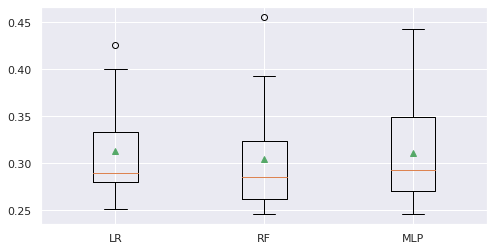

In [24]:
sns.set(rc={'figure.figsize':(8,4)})

bprecall = list()
for i in range(len(resultados)):
  rr = resultados[i]['test_MAPE']
  bprecall.append(rr)

plt.boxplot(bprecall, labels=nombres, showmeans=True)

plt.show()

Citando al articulo:

*Twelve performance metrics were modeled with these input features, from which the two models achieving the best performance modeled the “Lifetime Post Consumers” and the “Lifetime People who have liked a Page and engaged with a post” output features, with a mean absolute percentage error of 27.2% and of 26.9%, respectively.*

Ellos utilizaron 12 input features, mientras nosotros solo 7. Sin embargo, para la variable de salida LPE, ellos obtuvieron un MAPE del 26.9%. Nuestros modelos aun tienen bastante trabajo por delante. 

#**Ejercicio-8.**

Usando una búsqueda de malla con validación cruzada (GridSearchCV), busca los mejores hiperparámetros para el modelo MLP. Al menos deberás realizar la búsqueda en los hiperparámetros “hidden_layer_sizes”, “alpha” y “learning_rate_init”. Además aplica la validación cruzada con repeticiones (RepeatedKFold). Muestra los mejores hiperparámetros encontrados

Utilizamos MAPE como scoring ya que no se ha indicado ningun otro, pero es el que mas se ha usado

In [25]:
#obtenemos el modelo y los parametros 
modeloMLP_iter = MLPRegressor(max_iter=100000000)
cvLR = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0)

dicc_grid = [{'hidden_layer_sizes':[(5,5),(7,7),(9,9),(11,11),(13,13),(15,15)],
             'alpha':[0.0001, 0.001, 0.005],
             'learning_rate_init': [0.001, 0.005, 0.01]
             }]
             
grid = GridSearchCV(estimator=modeloMLP_iter, 
                    param_grid=dicc_grid, 
                    cv=cvLR, 
                    scoring=make_scorer(mi_MAPE,greater_is_better=False),
                    #scoring='neg_mean_absolute_percentage_error',
                    error_score='raise')

In [26]:
#X y Y ya se transformaron previamente
grid.fit(Xtvt, np.ravel(Ytvt))

print('Mejor valor de MAPE obtenido con la mejor combinación:', grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
print('Métrica utilizada:', grid.scoring)

Mejor valor de MAPE obtenido con la mejor combinación: -0.29678847774123085
Mejor combinación de valores encontrados de los hiperparámetros: {'alpha': 0.0001, 'hidden_layer_sizes': (11, 11), 'learning_rate_init': 0.005}
Métrica utilizada: make_scorer(mi_MAPE, greater_is_better=False)


#**Ejercicio-9.**

Con los mejores valores de los hiperparámetros encontrados realiza un análisis de la importancia de los factores. Muestra un diagrama de barras de los resultados e incluye tus conclusiones. 

Feature: 0, Score: 0.22719
Feature: 1, Score: 0.03449
Feature: 2, Score: 0.16036
Feature: 3, Score: 0.11999
Feature: 4, Score: 0.13756
Feature: 5, Score: 0.02648
Feature: 6, Score: 0.71726


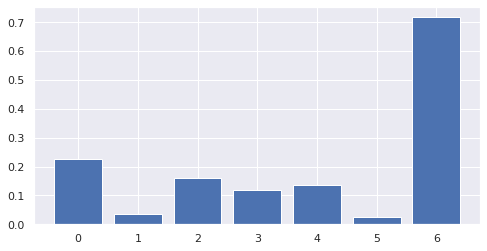

In [27]:
# Una vez inicializado y entrenada la MLP, veamos qué factores considera más importantes:

modelo_MLP = MLPRegressor(hidden_layer_sizes=grid.best_params_['hidden_layer_sizes'],
                            alpha=grid.best_params_['alpha'],
                            learning_rate_init=grid.best_params_['learning_rate_init'],
                            max_iter=100000000)  

modelo_MLP.fit(Xtvt, np.ravel(Ytvt))



importance = permutation_importance(modelo_MLP, Xtvt, np.ravel(Ytvt), n_repeats=10)

# visualicemos la importancia de cada métrica, de las cuales sabemos
# cuáles son las más importantes, de acuerdo a como se definieron al inicio:

for i,v in enumerate(importance['importances_mean']):
	print('Feature: %0d, Score: %.5f' % (i,v))


f = plt.figure()
plt.bar([x for x in range(len(importance['importances_mean']))], importance['importances_mean'])
plt.show()

#**Ejercicio-10.**

Repite el ejercicio 8 y 9 para el modelo de bosque aleatorio para buscar sus mejores hiperparámetros (realiza la búsqueda con aquellos hiperparámetros que consideres más adecuados) y usando el conjunto de Prueba. Y realiza igualmente el análisis de importancia de factores con este modelo con un diagrama de barras. 

In [28]:
#obtenemos el modelo y los parametros
modeloRF_iter = RandomForestRegressor(random_state=0)
cvRF = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0)

dicc_grid2 = [{'ccp_alpha':[0.0001,0.01,0.1,1.0,10.,100],'criterion':['squared_error','absolute_error','poisson'],
             'max_depth':[1,2,3,4,5],'min_samples_split':[2,3,4],'max_features':['sqrt', 'log2', None]}]
             
grid2 = GridSearchCV(estimator=modeloRF_iter, 
                    param_grid=dicc_grid2, 
                    cv=cvRF, 
                    scoring=make_scorer(mi_MAPE,greater_is_better=False),
                    #scoring='neg_mean_absolute_percentage_error',
                    error_score='raise')

In [29]:
#X y Y ya se transformaron previamente
grid2.fit(Xtvt, np.ravel(Ytvt))

print('Mejor valor de MAPE obtenido con la mejor combinación:', grid2.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid2.best_params_)
print('Métrica utilizada:', grid2.scoring)

Mejor valor de MAPE obtenido con la mejor combinación: -0.25130875310757667
Mejor combinación de valores encontrados de los hiperparámetros: {'ccp_alpha': 0.0001, 'criterion': 'absolute_error', 'max_depth': 3, 'max_features': None, 'min_samples_split': 3}
Métrica utilizada: make_scorer(mi_MAPE, greater_is_better=False)


Con los mejores valores de los hiperparámetros encontrados realiza un análisis de la importancia de los factores. Muestra un diagrama de barras de los resultados e incluye tus conclusiones.

Feature: 0, Score: 0.12736
Feature: 1, Score: 0.00282
Feature: 2, Score: 0.03376
Feature: 3, Score: 0.04535
Feature: 4, Score: 0.00394
Feature: 5, Score: 0.00717
Feature: 6, Score: 0.83530


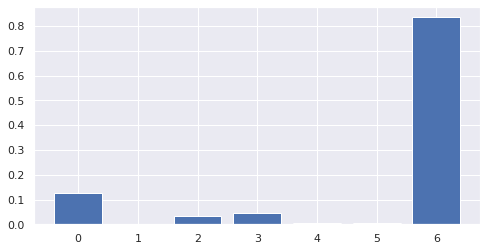

In [30]:
# Una vez inicializado y entrenada la MLP, veamos qué factores considera más importantes:
modelo_RF = RandomForestRegressor(ccp_alpha=grid2.best_params_['ccp_alpha'], 
                            criterion=grid2.best_params_['criterion'], 
                            max_depth=grid2.best_params_['max_depth'],
                            min_samples_split=grid2.best_params_['min_samples_split'],
                            max_features=grid2.best_params_['max_features'])  

modelo_RF.fit(Xtvt, np.ravel(Ytvt))

importance = permutation_importance(modelo_RF, Xtvt, np.ravel(Ytvt), n_repeats=10)

# visualicemos la importancia de cada métrica, de las cuales sabemos
# cuáles son las más importantes, de acuerdo a como se definieron al inicio:

for i,v in enumerate(importance['importances_mean']):
	print('Feature: %0d, Score: %.5f' % (i,v))
 
plt.bar([x for x in range(len(importance['importances_mean']))], importance['importances_mean'])
plt.show()

#**Ejercicio-11.**

Repite el ejercicio 8 y 9 para el modelo de regresión lineal múltiple para buscar sus mejores hiperparámetros (realiza la búsqueda con aquellos hiperparámetros que consideres más adecuados) y usando el conjunto de Prueba. Y realiza igualmente el análisis de importancia de factores con este modelo con un diagrama de barras. 

In [31]:
#obtenemos el modelo y los parametros
modeloLR_iter = LinearRegression()
cvLR = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0)

dicc_grid3 = [{'fit_intercept':[True,False]}]
             
grid3 = GridSearchCV(estimator=modeloLR_iter, 
                    param_grid=dicc_grid3, 
                    cv=cvLR, 
                    scoring=make_scorer(mi_MAPE,greater_is_better=False),
                    #scoring='neg_mean_absolute_percentage_error',
                    error_score='raise')

In [32]:
#X y Y ya se transformaron previamente
grid3.fit(Xtvt, np.ravel(Ytvt))

print('Mejor valor de MAPE obtenido con la mejor combinación:', grid3.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid3.best_params_)
print('Métrica utilizada:', grid3.scoring)

Mejor valor de MAPE obtenido con la mejor combinación: -0.3124818906905059
Mejor combinación de valores encontrados de los hiperparámetros: {'fit_intercept': True}
Métrica utilizada: make_scorer(mi_MAPE, greater_is_better=False)


Con los mejores valores de los hiperparámetros encontrados realiza un análisis de la importancia de los factores. Muestra un diagrama de barras de los resultados e incluye tus conclusiones.

Feature: 0, Score: 0.40855
Feature: 1, Score: 0.00252
Feature: 2, Score: 0.00065
Feature: 3, Score: -0.00015
Feature: 4, Score: 0.66571
Feature: 5, Score: 0.00009
Feature: 6, Score: 0.56420


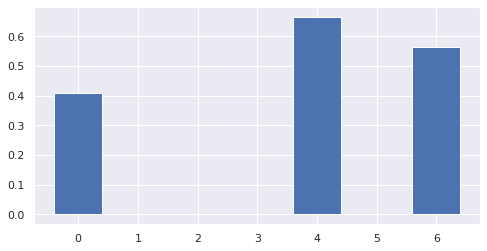

In [33]:
# Una vez inicializado y entrenada la MLP, veamos qué factores considera más importantes:
modelo_LR = LinearRegression(fit_intercept=grid3.best_params_['fit_intercept'])  

modelo_LR.fit(Xtvt, np.ravel(Ytvt))

importance = permutation_importance(modelo_LR, Xtvt, np.ravel(Ytvt), n_repeats=10)

# visualicemos la importancia de cada métrica, de las cuales sabemos
# cuáles son las más importantes, de acuerdo a como se definieron al inicio:

for i,v in enumerate(importance['importances_mean']):
	print('Feature: %0d, Score: %.5f' % (i,v))
 
plt.bar([x for x in range(len(importance['importances_mean']))], importance['importances_mean'])
plt.show()

#**Ejercicio-12.**

Compara tus resultados con los obtenidos por los autores del artículo de Moro-Rita-Vala con respecto a MAPE. Incluye tus conclusiones finales de la actividad. 

In [ ]:
None

###**Fin de la Actividad de la semana 7.**